In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/competitions/international-medical-ai-and-data-science-calorie/data?select=train.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kunalsharma2134
Your Kaggle Key: ··········


100%|██████████| 12.5M/12.5M [00:00<00:00, 1.27GB/s]


Extracting archive ./international-medical-ai-and-data-science-calorie/international-medical-ai-and-data-science-calorie.zip to ./international-medical-ai-and-data-science-calorie


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
train = pd.read_csv("/content/international-medical-ai-and-data-science-calorie/train.csv")
test = pd.read_csv("/content/international-medical-ai-and-data-science-calorie/test.csv")

In [6]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [7]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [8]:
print(train.shape)
print(test.shape)

(750000, 9)
(250000, 8)


In [9]:
test_id = test['id']

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [11]:
print(f"total null values in Train: {train.isna().sum()}")
print(f"total null values in Test: {test.isna().sum()}")

total null values in Train: id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64
total null values in Test: id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


In [12]:


train.corr(numeric_only=True)

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,1.000000,0.002330,0.000101,0.000524,0.001647,0.001092,0.001612,0.001148
Age,0.002330,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683
Height,0.000101,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,0.000524,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.001647,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,0.001092,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.001612,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,0.001148,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


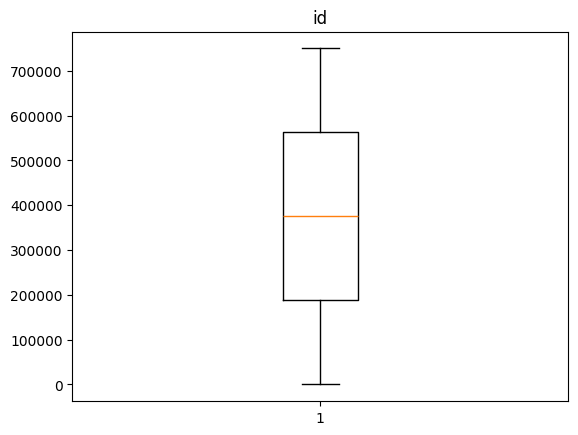

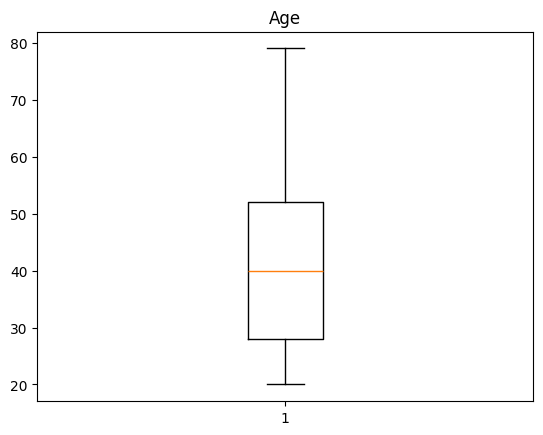

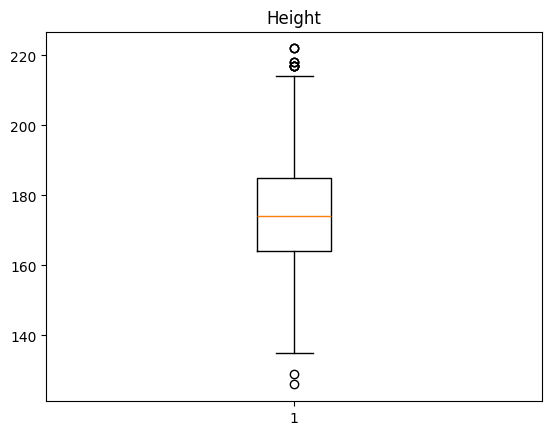

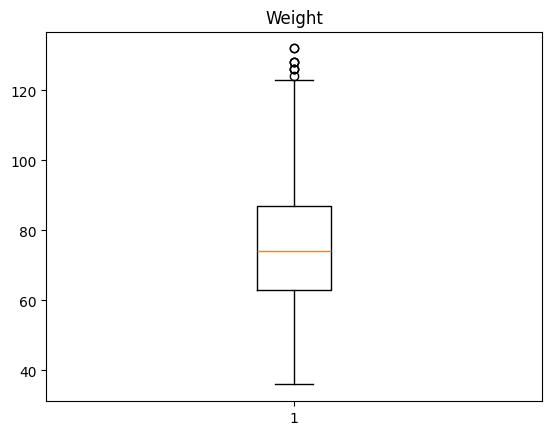

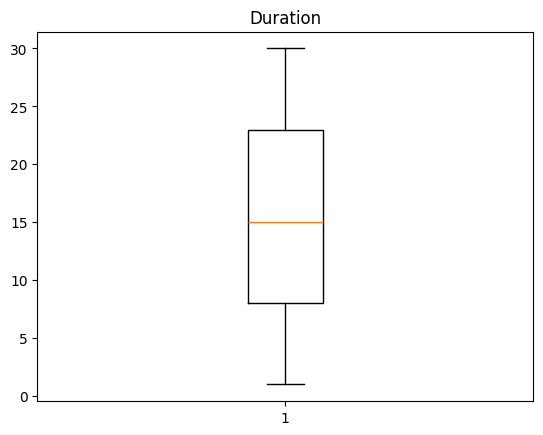

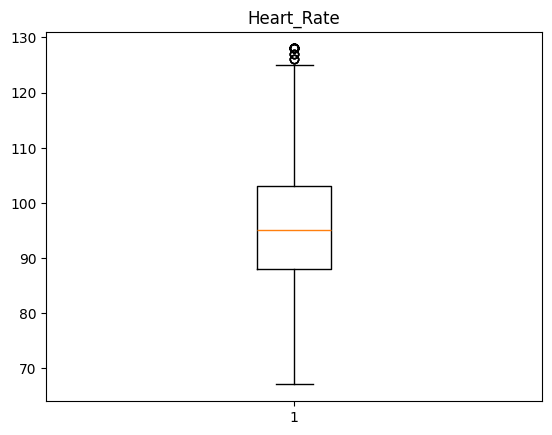

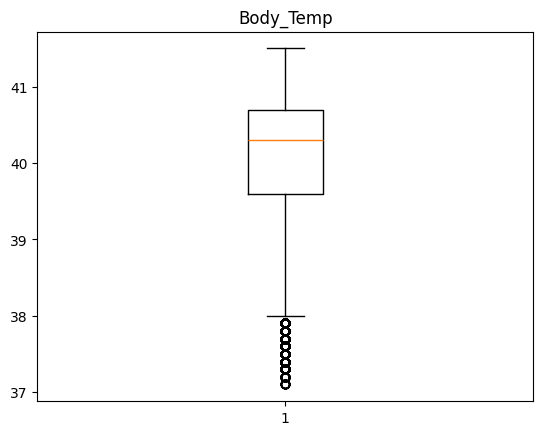

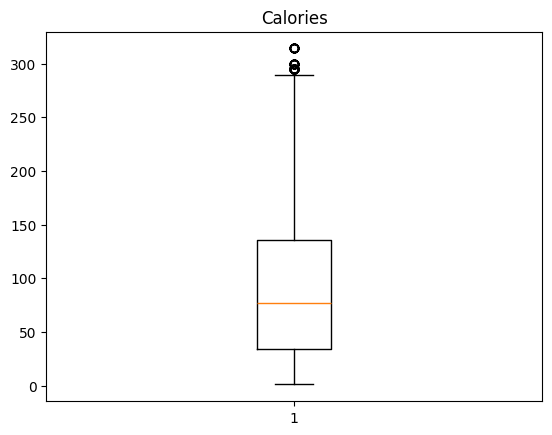

In [13]:
for col in train.columns:
  if train[col].dtype != 'object':
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()



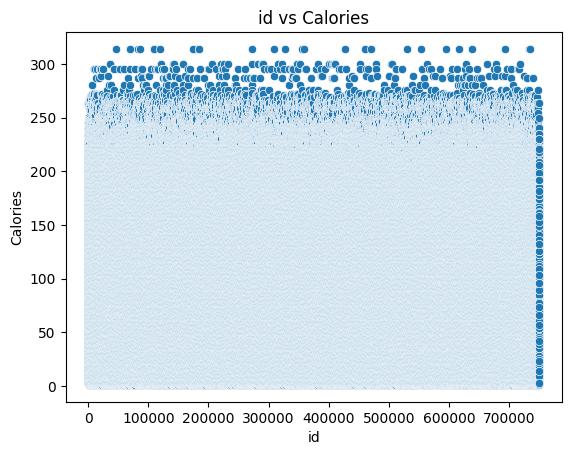

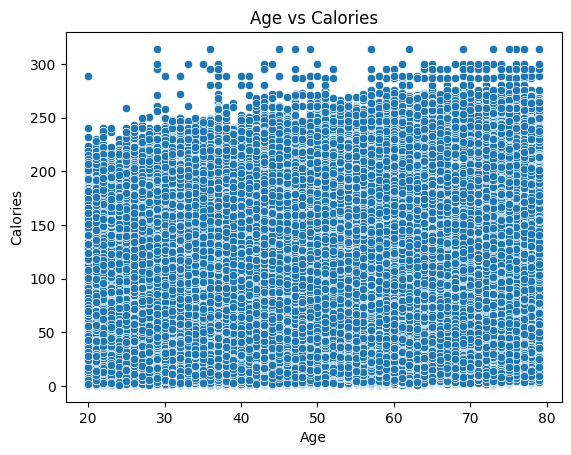

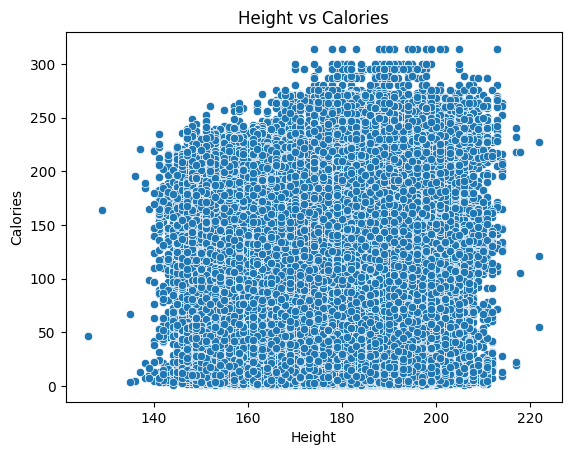

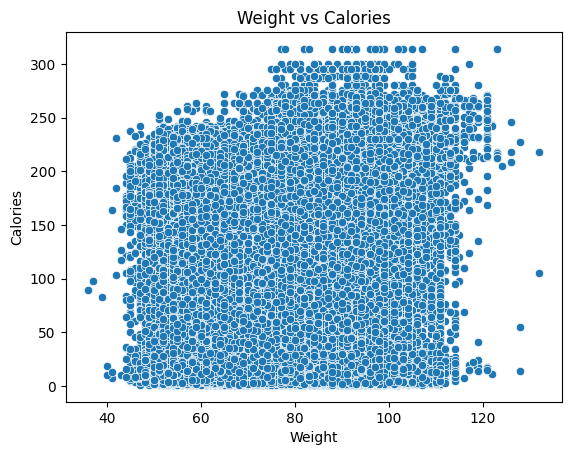

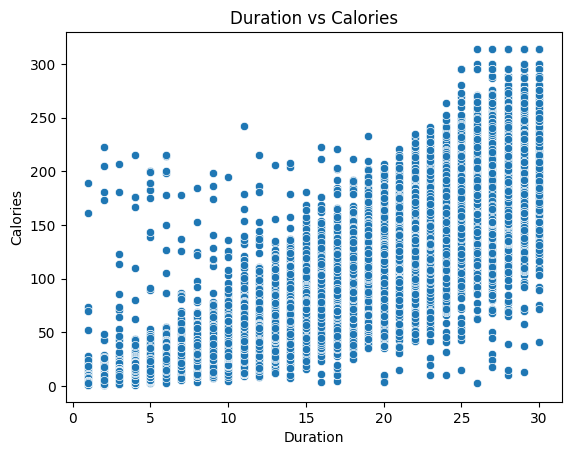

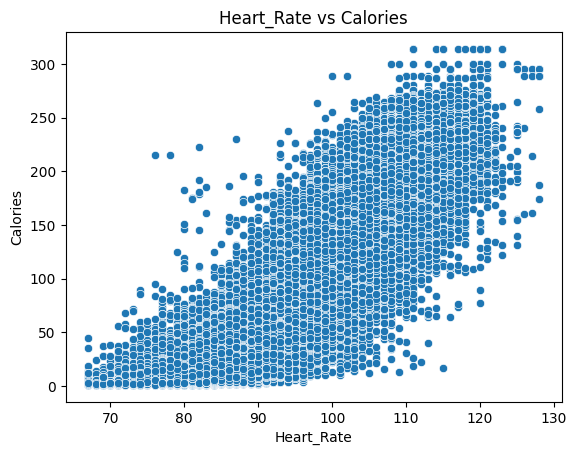

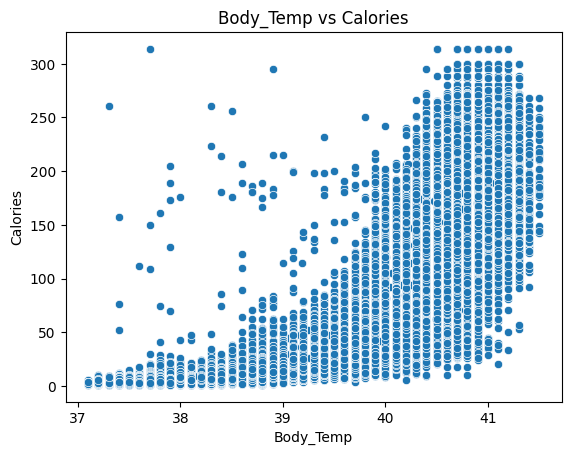

In [14]:
target = 'Calories'

for col in train.columns:
  if train[col].dtype != 'object' and col != target:
    sns.scatterplot(x=train[col],y=train[target])
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

In [15]:
train.head(2)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0


In [16]:
test.head(2)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5


In [17]:

le = LabelEncoder()

train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])

In [18]:
X = train.drop(columns='Calories')
y = train['Calories']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(600000, 8)
(150000, 8)
(600000,)
(150000,)


In [25]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,1,45,177.0,81.0,7.0,87.0,39.8
1,750001,1,26,200.0,97.0,20.0,101.0,40.5
2,750002,0,29,188.0,85.0,16.0,102.0,40.4
3,750003,0,39,172.0,73.0,20.0,107.0,40.6
4,750004,0,30,173.0,67.0,16.0,94.0,40.5


In [26]:
dt = DecisionTreeRegressor(
    criterion="squared_error",
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)


dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9660087716289838
MSE: 131.73693627931934


In [29]:
train['Calories'].unique()

array([150.,  34.,  29., 140., 146., 103.,   9., 145., 161., 185.,  86.,
        28., 202.,  87.,  23.,  47.,  80.,   3.,  10.,  13.,  35., 264.,
       187.,  51., 105.,  72.,  16.,  98.,  61.,  20., 195.,  36., 106.,
       109.,  15.,  95., 165.,   4., 209., 133.,  66.,  92., 101., 214.,
       136.,  31., 110.,  26.,  30., 170.,  84., 113.,  77., 108.,  63.,
        78.,  57.,  27., 128.,  70.,   8.,  96.,   7.,  39., 235., 151.,
        58.,  88.,  68.,  97.,  60.,  59., 154.,  81.,  42., 221.,  52.,
       124.,  54., 198.,  17., 166.,  55.,   5.,  64.,  90., 200., 115.,
       102., 230., 149.,  89., 111.,  50., 226.,  82.,  25., 119., 121.,
        37.,  75., 158.,  21., 240.,  41., 152., 131., 191.,  12.,  65.,
        71., 212.,   6., 138., 172., 203.,  94.,  14., 192.,  99.,  11.,
        74., 173.,  83., 123.,  62., 125., 223., 159., 118.,  43., 176.,
       130., 153., 167., 129.,  93., 147., 182., 218.,  53.,  79., 213.,
       225., 134.,  48.,  33.,  44.,  56., 104., 17

In [30]:
from xgboost import XGBRegressor

In [31]:


models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1)
}

In [37]:
result = {}


def rmsle(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.maximum(0, np.array(y_pred))
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred))**2))


for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmsle_val = rmsle(y_test, y_pred)

  result[name] = {"R2 Score": r2, "MSE": mse, "RMSLE": rmsle_val}



results_df = pd.DataFrame(result).T
print(results_df)

               R2 Score         MSE     RMSLE
Decision Tree  0.966009  131.736936  0.177218
Random Forest  0.967602  125.561416  0.173423
XGBoost        0.996104   15.098004  0.078552


In [38]:
prediction = models['XGBoost'].predict(test)

In [39]:
prediction

array([ 27.267975, 110.711845,  87.4603  , ...,  73.20807 , 168.35234 ,
        77.02516 ], dtype=float32)

In [42]:
si = pd.Series(prediction,name='Prediction')

In [43]:
type(si
     )

pandas.core.series.Series

In [49]:
submission = pd.concat([test,si],axis=1)

In [48]:
prediction.shape

(250000,)

In [47]:
test.shape

(250000, 8)

In [51]:
submission = submission[['id','Prediction']]

In [52]:
submission

,id,Prediction
0,750000,27.267975
1,750001,110.711845
2,750002,87.460297
3,750003,127.939484
4,750004,73.868279
...,...,...
249995,999995,26.572659
249996,999996,9.174951
249997,999997,73.208069
249998,999998,168.352341


In [53]:
submission.to_csv('submission.csv',index=False)

In [55]:
train.shape

(750000, 9)

In [56]:
submission['Prediction'].unique()

array([ 27.267975, 110.711845,  87.4603  , ...,  73.20807 , 168.35234 ,
        77.02516 ], dtype=float32)